Tudo da vida segue uma distribuição gaussiana.
-V.C.A Marcelo

### Libraries

In [1]:
import pandas as pd
import numpy as np
import metrics

Reading dataframes

In [2]:
df_gold = pd.read_csv('../data/d_kilo_gold_price_in_currency.csv')
df_gold['date'] = pd.to_datetime(df_gold['date'], infer_datetime_format=True)

### Configuration

In [3]:
from sklearn.model_selection import train_test_split

data_x = np.arange(0, len(df_gold['date'])).reshape(-1,1)
data_y = np.array(df_gold['China'])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.50)
print("Train:", len(x_train))
print("Test:", len(x_test))

Train: 183
Test: 183


## Linear Regression

[source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Coeficiente:  -0.0003438963428317062


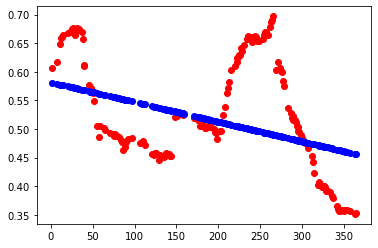

MSE:  0.007779315839361513
RMSE: 0.08820042992730541
MAE:  0.07243218349301223
MAPE: 0.16172412769409358
R2:   0.14001953047886473


In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt

model = linear_model.LinearRegression()
model.fit(x_train, y_train.reshape(-1,1))

print("Coeficiente: ", model.coef_[0][0])

y_predict = model.predict(x_test)

plt.scatter(x_test, y_test, color="red")
plt.scatter(x_test, y_predict, color="blue", linewidth=1)
plt.show()

metrics.regression_metrics(y_test, y_predict)

## Polynomial interpolation

[source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)

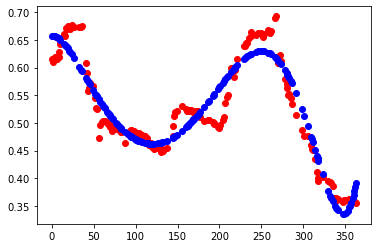

MSE:  0.01586293510775027
RMSE: 0.1259481445188863
MAE:  0.10114378529934724
MAPE: 0.19678517012016636
R2:   -0.7536007874782507


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=7)
x_poly = poly_reg.fit_transform(x_train)

pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

y_predict = pol_reg.predict(x_poly)

plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, y_predict, color='blue')
plt.show()

metrics.regression_metrics(y_test, y_predict)

## Support Vector Rregression

[source](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

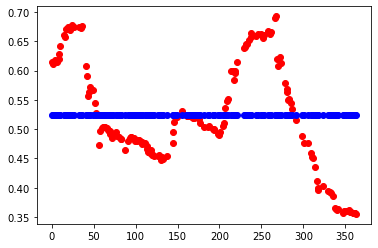

MSE:  0.009052368238927634
RMSE: 0.09514393432546099
MAE:  0.07861982921770853
MAPE: 0.15481021851436774
R2:   -0.0007126653736868604


In [6]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y_train)

y_predict = regr.predict(x_train)

plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, y_predict, color='blue')
plt.show()

metrics.regression_metrics(y_test, y_predict)

## Multi-layer Perceptron regressor

[source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [7]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1).fit(x_train, y_train)
regr.predict(y_test)
regr.score(x_test, y_test)

plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, y_predict, color='blue')
plt.show()

metrics.regression_metrics(y_test, y_predict)

ValueError: Expected 2D array, got 1D array instead:
array=[0.68627061 0.35694193 0.6109872  0.35953986 0.45319499 0.35814045
 0.65392708 0.53687839 0.63566169 0.52760103 0.50493866 0.48867965
 0.49113007 0.66819223 0.48619955 0.40190653 0.48410576 0.58260789
 0.52280787 0.61803111 0.65261988 0.66063304 0.48028614 0.62987053
 0.39791705 0.52492274 0.49517663 0.60740126 0.48537799 0.38382848
 0.458879   0.52513791 0.50287158 0.45310783 0.46719773 0.39868609
 0.62417054 0.45215089 0.50559524 0.52294601 0.50011482 0.47439003
 0.62560617 0.52641132 0.66441429 0.65801262 0.66308308 0.45508219
 0.50454589 0.49699427 0.47730095 0.66942541 0.49345693 0.39963157
 0.4042377  0.47675479 0.64663723 0.3566273  0.46420275 0.67340899
 0.45685801 0.56269845 0.60241816 0.50737993 0.39163226 0.51960271
 0.45460683 0.50510681 0.44634493 0.60595981 0.47844884 0.37983645
 0.57666392 0.69130075 0.65523122 0.5042481  0.67881018 0.67605215
 0.64892293 0.50210116 0.45741179 0.65394558 0.45685069 0.46831279
 0.42360759 0.6024329  0.67492496 0.45606421 0.40684746 0.6567027
 0.45232036 0.52090472 0.36609475 0.67731796 0.58328237 0.49867717
 0.47582654 0.4919586  0.53938593 0.51638586 0.57559717 0.35815184
 0.48335723 0.51964751 0.35870354 0.44235875 0.66364169 0.39061723
 0.52804407 0.52820664 0.47167105 0.35632884 0.50584704 0.3566934
 0.65738862 0.66498971 0.57136914 0.48156548 0.66045586 0.4730895
 0.56230864 0.67527226 0.35163605 0.45154259 0.57104114 0.66898967
 0.35366643 0.52781642 0.59938466 0.50896112 0.66410761 0.51601256
 0.50495796 0.65918349 0.49299846 0.45332271 0.61108842 0.51220265
 0.47744305 0.48739684 0.6698192  0.48267829 0.65543385 0.35789785
 0.40356985 0.67070661 0.50669688 0.47766135 0.39898544 0.61774973
 0.45693888 0.49448386 0.64154709 0.50165758 0.48427963 0.49719493
 0.60143497 0.54952273 0.52873249 0.50232483 0.475435   0.45473275
 0.4002273  0.51592965 0.60943679 0.57127135 0.52279381 0.49020044
 0.660577   0.49723925 0.47619584 0.62929234 0.50333446 0.61772054
 0.66863633 0.39147525 0.69718274 0.45792067 0.66067936 0.50567949
 0.67032126 0.66227938 0.52757238].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Prophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

m = Prophet()

m.fit(pd.DataFrame(x_train,y_train))

In [ ]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)  # this will take a minute
y = model.sampling(n_jobs=1).extract()['y']
y.mean()  # should be close to 0